In [2]:
from pydub import AudioSegment

In [54]:
audio = AudioSegment.from_wav('agentinsights.wav')


In [7]:
print(type(audio))

<class 'pydub.audio_segment.AudioSegment'>


In [8]:
print(audio.frame_rate)

44100


In [9]:
print(audio.channels)

2


In [10]:
print(audio.sample_width)

2


In [11]:
print(audio.max)

21028


In [12]:
print(len(audio))

141624


In [13]:
# Get the duration in seconds
duration_in_seconds = len(audio) / 1000.0  # Convert milliseconds to seconds

In [14]:
duration_in_seconds

141.624

In [15]:
import matplotlib.pyplot as plt 
import numpy

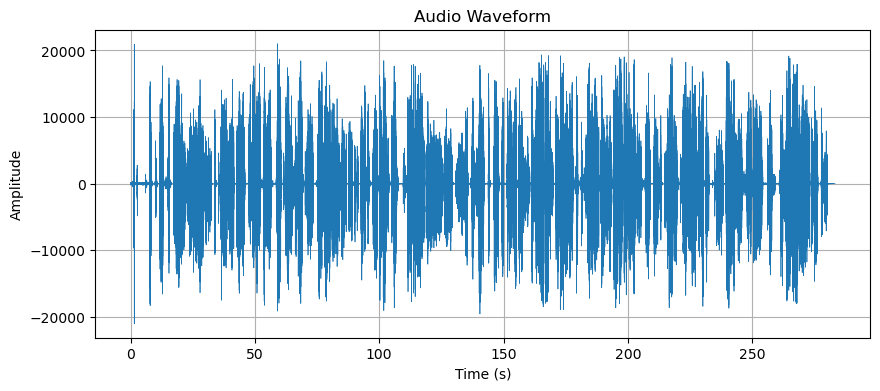

In [19]:
audio_data = audio.get_array_of_samples()

# Get the sample rate (number of samples per second)
sample_rate = audio.frame_rate

# Calculate the time values for the x-axis
time_values = [float(i) / sample_rate for i in range(len(audio_data))]

# Create a plot
plt.figure(figsize=(10, 4))
plt.plot(time_values, audio_data, linewidth=0.5)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Display the plot
plt.show()


In [29]:
from pydub.silence import split_on_silence

# Split the audio on silence (assuming silence separates speakers)
min_silence_length = 900  # Minimum silence duration in milliseconds
silence_threshold = -40  # Threshold for silence in dB
segments = split_on_silence(audio, min_silence_len=min_silence_length, silence_thresh=silence_threshold)

# Export the segmented audio
for i, segment in enumerate(segments):
    segment.export(f"segment_{i}.wav", format="wav")

In [30]:
from pydub import AudioSegment
import os

# Specify the directory where the segments were saved
output_directory = 'C:\\Users\\audio\\'

# List audio files in the specified directory
segment_files = [f for f in os.listdir(output_directory) if f.startswith("segment_") and f.endswith(".wav")]

# Play the audio segments
for segment_file in segment_files:
    segment = AudioSegment.from_file(os.path.join(output_directory, segment_file), format="wav")
    segment.export("temp.wav", format="wav")  # Export to a temporary file
    os.system("your_audio_player temp.wav")  # Replace 'your_audio_player' with the command for your audio player
